**LAB 2 GRUPO 4**


*   ANGEL GUILLERMO PEÑARREDONDA SILVA
*   REINALDO TOLEDO LEGUIZAMON
*   IVAN ALEXANDER MORALES MUÑOZ

In [ ]:
pip install -U fortran-magic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
# philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 5 µs, total: 37 µs
Wall time: 41.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
# CREATING DATAFRAME FOR EXAMPLES
import pandas as pd
import numpy as np

languages = ["NumPy","Fortran","Fortranmagic","Java","c","C++","Javascript","Python"]
timeExec = pd.DataFrame({"Language": languages, "Avrg.Secs": [0.0]*len(languages), "Speed Factor": [0.0]*len(languages)})
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.0,0.0
1,Fortran,0.0,0.0
2,Fortranmagic,0.0,0.0
3,Java,0.0,0.0
4,c,0.0,0.0
5,C++,0.0,0.0
6,Javascript,0.0,0.0
7,Python,0.0,0.0


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.208
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.41
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A[0])
    cols_out = len(B)
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)


[[5, 8], [8, 13], [17, 28]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B Changing."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if( len(A[0]) == len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("Number of columns of first matrix don't match with number of rows of second matrix")
      raise Exception("Number of columns of first matrix don't match with number of rows of second matrix") 
    return out


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a,b)


Number of columns of first matrix don't match with number of rows of second matrix


Exception: ignored

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
a = [[41, 21, 53],
     [32, 6, 52],
     [15, 6, 10],
     [10, 100, 1]]

b = [[7, 69, 23, 15],
     [23, 31, 4, 1],
     [0, 8, 7, 7]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

1.0464450517087673

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7578714982814415, 0.2760737999873518, 0.25495362009939404],
 [0.5261580941311808, 0.861742500579091, 0.29612387728849887]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
##Creating random matrix
randa=random_matrix(600,100)
randb=random_matrix(100,600)

In [ ]:

%%time
for i in range(10):
  matmul(randa,randb)

CPU times: user 1min 52s, sys: 261 ms, total: 1min 52s
Wall time: 1min 55s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
timeExec.iat[7, timeExec.columns.get_loc('Avrg.Secs')]=99/10


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9556694921776202, 0.9882682944828847, 0.8224622226219329],
 [0.37315423202135256, 0.2822905222997407, 0.5863635804188464]]

In [ ]:
import time
m=0

for i in range(0,10):
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600)  
 
  s=time.time()  
  x = matmul(randa, randb)
  e=time.time()-s
  m=m+e
m=m/10

In [ ]:
timeExec.iat[0, timeExec.columns.get_loc('Avrg.Secs')]=m

In [ ]:
import time
mn=0
for i in range(0,10):
  
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600) ) 
  s=time.time()  
  x=randa@randb
  e=time.time()-s
  mn=mn+e
mn=mn/100
time_data_frame=pd.DataFrame([mn],index=['NumPy'],columns=['Average (Promedio)'])
time_data_frame

,Average (Promedio)
NumPy,0.000388


In [ ]:
timeExec.iat[0, timeExec.columns.get_loc('Avrg.Secs')]= mn
timeExec


,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,0.0
1,Fortran,0.000000,0.0
2,Fortranmagic,0.000000,0.0
3,Java,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,9.900000,0.0


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.3 s, sys: 29.6 ms, total: 11.3 s
Wall time: 11.4 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 14.9 ms, sys: 11 µs, total: 14.9 ms
Wall time: 16.3 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 222 µs, sys: 3 µs, total: 225 µs
Wall time: 234 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
%%writefile tmpf.f
      program TEST
        INTEGER, DIMENSION(2, 2) :: a, b
        INTEGER :: i,j

        do i = 1, 2
          do j = 1, 2
              a(i, j) = i+j
          end do
        end do

        do i = 1, 2
          do j = 1, 2
              b(i, j) = i+j
          end do
        end do


	      stop
      end

Writing tmpf.f


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%writefile tmpf.f
      program TEST
        INTEGER, DIMENSION(2, 2) :: a, b, c
        INTEGER :: i,j

        do i = 1, 2
          do j = 1, 2
              a(i, j) = i+j
          end do
        end do

        do i = 1, 2
          do j = 1, 2
              b(i, j) = i*j
          end do
        end do

        c = matmul(a, b)
        Print*, 'Result Multiplication Matrix'
   
        do i = 1, 2
            do j = 1, 2
              print*, c(i, j)
            end do
        end do

	      stop
      end

Overwriting tmpf.f


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
!gfortran tmpf.f -o tmpf
!./tmpf

 Result Multiplication Matrix
           8
          16
          11
          22


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
      subroutine fortran_matmul()
        INTEGER, DIMENSION(600, 100) :: a
        INTEGER, DIMENSION(100, 600) :: b
        INTEGER, DIMENSION(100, 100) :: c
        INTEGER :: i,j

        do i = 1, 600
          do j = 1, 100
              a(i, j) = i+j
          end do
        end do

        do i = 1, 100
          do j = 1, 100
              b(i, j) = i*j
          end do
        end do

        c = matmul(b, a)
   

      end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
fortran_matmul()

CPU times: user 341 µs, sys: 994 µs, total: 1.34 ms
Wall time: 1.39 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time

times = []
for i in range(10):
  start = time.time()
  fortran_matmul()
  end = time.time()
  times.append(end-start)

np.array(times).mean()
timeExec.at[2, 'Avrg.Secs']= np.array(times).mean()*10
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,0.0
1,Fortran,0.000000,0.0
2,Fortranmagic,0.015097,0.0
3,Java,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,9.900000,0.0


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpf.f
      program TEST
        INTEGER, DIMENSION(600, 100) :: a
        INTEGER, DIMENSION(100, 600) :: b
        INTEGER, DIMENSION(100, 100) :: c
        INTEGER :: i,j

        do i = 1, 600
          do j = 1, 100
              a(i, j) = i+j
          end do
        end do

        do i = 1, 100
          do j = 1, 600
              b(i, j) = i*j
          end do
        end do

        c = matmul(b, a)

	      stop
      end

Overwriting tmpf.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!gfortran tmpf.f -o tmpf
!./tmpf

CPU times: user 10.9 ms, sys: 17.9 ms, total: 28.8 ms
Wall time: 242 ms


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
timeExec.at[1, 'Avrg.Secs']= 246/100000
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,0.0
1,Fortran,0.002460,0.0
2,Fortranmagic,0.015097,0.0
3,Java,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,9.900000,0.0


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc.c

#include <stdlib.h>
#include<time.h>
#include<stdio.h>

int main()
{
    srand(time(0));
    int A[600][100],B[100][600],matrizr[600][600];
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            A[i][j]=rand()%100;
        }
    }
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            B[i][j]=rand()%100;
        }
    }


    float ti,tf,retx;
    double time_spent=0.0;
    for(int rep=0;rep<10;rep++){
        ti=clock();
        for(int i=0;i<600;i++){
            for(int j=0;j<600;j++){
                matrizr[i][j]=0;
                for(int k=0;k<100;k++){
                    matrizr[i][j]+=A[i][k]*B[k][j];
              }
            }
        }
        tf=clock();
      time_spent += (double)(tf - ti) / CLOCKS_PER_SEC;
    }
    printf("%f",time_spent/10);
   return 0;
}

Writing tmpc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc tmpc.c -o tmpc
!./tmpc

0.204424

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
timeExec.iat[4, timeExec.columns.get_loc('Avrg.Secs')]= 0.15735
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,0.0
1,Fortran,0.002460,0.0
2,Fortranmagic,0.015097,0.0
3,Java,0.000000,0.0
4,c,0.157350,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,9.900000,0.0


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc++.cpp


#include <iostream>
#include <chrono>
using namespace std::chrono;
 
using namespace std;
 
 
void mulMat(int mat1[][C1], int mat2[][C2]) {
    int rslt[R1][C2];
 

 
    for (int i = 0; i < R1; i++) {
        for (int j = 0; j < C2; j++) {
            rslt[i][j] = 0;
 
            for (int k = 0; k < R2; k++) {
                rslt[i][j] += mat1[i][k] * mat2[k][j];
            }
 
        }
 
    }
}
 
int main(void) {
    // Square Matrices
    // R1 = 4, C1 = 4 and R2 = 4, C2 = 4 (Update these values in MACROs)
    int mat1[R1][C1] = {
            {1, 1, 1, 1},
            {2, 2, 2, 2},
            {3, 3, 3, 3},
            {4, 4, 4, 4}
    };
 
    int mat2[R2][C2] = {
            {1, 1, 1, 1},
            {2, 2, 2, 2},
            {3, 3, 3, 3},
            {4, 4, 4, 4}
    };
 
    /*
    // Rectangular Matrices
    // R1 = 3, C1 = 4 and R2 = 4, C2 = 3 (Update these values in MACROs)
    int mat1[R1][C1] = {
                {1, 1, 1, 1},
                {2, 2, 2, 2},
                {3, 3, 3, 3}
    };
 
    int mat2[R2][C2] = {
                {1, 1, 1},
                {2, 2, 2},
                {3, 3, 3},
                {4, 4, 4}
    };
    */
 
    if (C1 != R2) {
        cout << "The number of columns in Matrix-1  must be equal to the number of rows in "
                "Matrix-2" << endl;
        cout << "Please update MACROs according to your array dimension in #define section"
                << endl;
 
        exit(EXIT_FAILURE);
    }
 
    for (int i = 0; i < 10; i++){
      auto start = high_resolution_clock::now();
      mulMat(mat1, mat2);
      auto stop  = high_resolution_clock::now();
      auto duration = duration_cast<microseconds>(stop - start);
      cout << "Time: "
         << duration.count() << " microseconds" << endl;
    }

 
    return 0;
}

Writing tmpc++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ tmpc++.cpp -o tmpc++
!./tmpc++

tmpc++.cpp:10:24: error: ‘C1’ was not declared in this scope
   10 | void mulMat(int mat1[][C1], int mat2[][C2]) {
      |                        ^~
tmpc++.cpp:10:27: error: expected ‘)’ before ‘,’ token
   10 | void mulMat(int mat1[][C1], int mat2[][C2]) {
      |            ~              ^
      |                           )
tmpc++.cpp:10:29: error: expected unqualified-id before ‘int’
   10 | void mulMat(int mat1[][C1], int mat2[][C2]) {
      |                             ^~~
tmpc++.cpp: In function ‘int main()’:
tmpc++.cpp:31:14: error: ‘R1’ was not declared in this scope
   31 |     int mat1[R1][C1] = {
      |              ^~
tmpc++.cpp:31:18: error: ‘C1’ was not declared in this scope
   31 |     int mat1[R1][C1] = {
      |                  ^~
tmpc++.cpp:38:14: error: ‘R2’ was not declared in this scope
   38 |     int mat2[R2][C2] = {
      |              ^~
tmpc++.cpp:38:18: error: ‘C2’ was not declared in this scope
   38 |     int mat2[R2][C2] = {
      |                 

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
timeExec.at[5, "Avrg.Secs"] = (np.array([219333 ,201889 ,212057 ,199797 ,200597 ,210312 ,202244 ,201007 ,202998 ,204244 ]).mean())/1000000
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,0.0
1,Fortran,0.002460,0.0
2,Fortranmagic,0.015097,0.0
3,Java,0.000000,0.0
4,c,0.157350,0.0
5,C++,0.205448,0.0
6,Javascript,0.000000,0.0
7,Python,9.900000,0.0


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.Arrays;
import java.util.Random;
class Main {

  public static void main(String[] args) {
    try{
      int[][] A=randomMatrix(600,100);
      int[][] B=randomMatrix(100,600);
      long timei = System.nanoTime();
      for(int i=0;i<10;i++){
        mulmat(A,B);
      }
      long timef = System.nanoTime();
      System.out.println("Average time in nanoSec: "+((timef - timei)/10));
    }catch(Exception e){
      System.out.println(e);
    }
    
  }
  public static int[][] randomMatrix(int x,int y){
    Random r=new Random();
    int[][] a=new int[x][y];
    for(int i=0;i<x;i++)
    {
        for(int j=0;j<y;j++)
        {
          a[i][j]=r.nextInt(20);
        }
    }
    return a;
  }
  public static void imp(int[][] matriz){
    for (int x=0; x < matriz.length; x++) {
  System.out.print("|");
  for (int y=0; y < matriz[x].length; y++) {
    System.out.print (matriz[x][y]);
    if (y!=matriz[x].length-1) System.out.print("\t");
  }
  System.out.println("|");
}
System.out.println("");
  }
  public static int[][] mulmat(int[][]A,int[][]B) throws Exception{
    int [] [] matrix = new int [A.length] [B[0].length];
    if(A[0].length==B.length){
      for(int i=0;i<A.length;i++){
        for(int j=0;j<B[0].length;j++){
          for(int k=0;k<B.length;k++){
            matrix[i][j]+=A[i][k]*B[k][j];
          }
        }
      }
    }else{
      throw new Exception("Number of columns of first matrix don't match with number of rows of second matrix");
    }
    return matrix;
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Main.java


In [ ]:
!java Main


Average time in nanoSec: 69762988


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
timeExec.iat[3, timeExec.columns.get_loc('Avrg.Secs')]=(66408285/10**9) 


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js
const { performance } = require('perf_hooks');

function generateWeights(rows, cols) {
  return Array.from({ length: rows }).map(() =>
    Array.from({ length: cols }).map(() => Math.random() * 2)
  );
}

function multiply(a, b) {
  var aNumRows = a.length, aNumCols = a[0].length,
      bNumRows = b.length, bNumCols = b[0].length,
      m = new Array(aNumRows);  // initialize array of rows
  for (var r = 0; r < aNumRows; ++r) {
    m[r] = new Array(bNumCols); // initialize the current row
    for (var c = 0; c < bNumCols; ++c) {
      m[r][c] = 0;             // initialize the current cell
      for (var i = 0; i < aNumCols; ++i) {
        m[r][c] += a[r][i] * b[i][c];
      }
    }
  }
  return m;
}

for (var i = 0; i < 10; i++){
  var start = performance.now();
  var a = generateWeights(600, 100);
  var b = generateWeights(100, 600);
  multiply(a, b);
  var end = performance.now();
  var time = end- start;
  console.log(time + " ms");
}

Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**




In [ ]:
!node tmp.js


293.8149200002663 ms
283.80056999996305 ms
246.38228400005028 ms
302.72156199999154 ms
258.3147249999456 ms
260.0834820000455 ms
274.976505999919 ms
263.7925620004535 ms
302.01705199992284 ms
462.08592099975795 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
timeExec.at[6, "Avrg.Secs"] = (np.array([270.4992430000566,280.312692000065,261.6331390000414,248.79184699989855,241.48316300008446,254.36273900000378,261.2957840000745,246.49089200003073,259.89569899998605,269.1284000000451,]).mean())/1000
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,0.0
1,Fortran,0.002460,0.0
2,Fortranmagic,0.015097,0.0
3,Java,0.066408,0.0
4,c,0.157350,0.0
5,C++,0.205448,0.0
6,Javascript,0.259389,0.0
7,Python,9.900000,0.0


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
speed_factor=min(timeExec["Avrg.Secs"])
speed_factor

0.00038756608963012694

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
timeExec["Speed Factor"]=timeExec["Avrg.Secs"]/speed_factor


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
timeExec.sort_values(by=['Avrg.Secs'])


,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000388,1.000000
1,Fortran,0.002460,6.347305
2,Fortranmagic,0.015097,38.953106
3,Java,0.066408,171.346995
4,c,0.157350,405.995272
5,C++,0.205448,530.097461
6,Javascript,0.259389,669.277748
7,Python,9.900000,25544.030463


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
#data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example 34**

In [ ]:
#Departamentos y municipios de Colombia
import matplotlib.pyplot as plt

import pandas as pd
import random
import requests

response = requests.get("https://www.datos.gov.co/resource/xdk5-pm3f.json")

normas = pd.DataFrame(response.json())

normas

,region,c_digo_dane_del_departamento,departamento,c_digo_dane_del_municipio,municipio
0,Región Eje Cafetero - Antioquia,5,Antioquia,5.001,Medellín
1,Región Eje Cafetero - Antioquia,5,Antioquia,5.002,Abejorral
2,Región Eje Cafetero - Antioquia,5,Antioquia,5.004,Abriaquí
3,Región Eje Cafetero - Antioquia,5,Antioquia,5.021,Alejandría
4,Región Eje Cafetero - Antioquia,5,Antioquia,5.03,Amagá
...,...,...,...,...,...
995,Región Pacífico,76,Valle del Cauca,76.606,Restrepo
996,Región Centro Oriente,54,Norte de Santander,54.8,Teorama
997,Región Pacífico,76,Valle del Cauca,76.233,Dagua
998,Región Centro Oriente,54,Norte de Santander,54.051,Arboledas


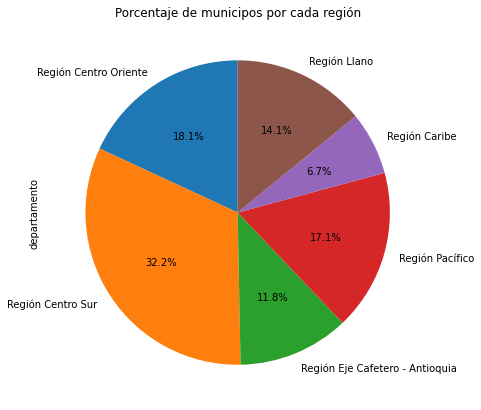

In [ ]:
r = normas.loc[:, ['region']]
region_values = set(r.values.flatten());

normas.groupby(['region'])['departamento'].count().plot(kind='pie', y='values', labels=region_values, autopct='%1.1f%%', startangle=90);

plt.title('Porcentaje de municipos por cada región');

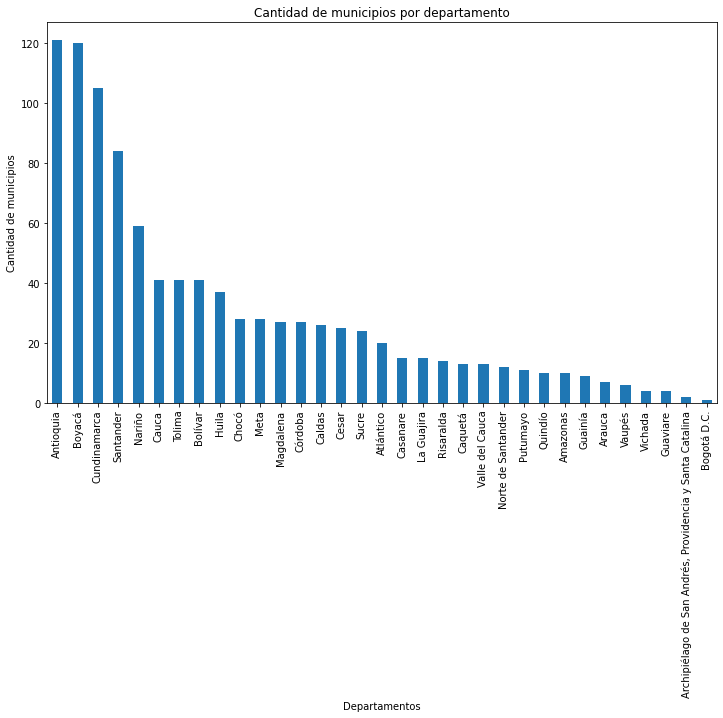

In [ ]:
normas['departamento'].value_counts().plot(kind='bar');

plt.xlabel('Departamentos')
plt.ylabel('Cantidad de municipios')
plt.title("Cantidad de municipios por departamento");

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!